In [1]:
#import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import warnings
from test_known_histos import *

In [2]:
import os
from pathlib import Path

In [3]:
folder_out=os.path.join(
    os.path.dirname(os.getcwd()),
    "04_ML_classification"
)
path_root = Path(folder_out)
files=[root_file.as_posix() for root_file in path_root.glob('**/*.csv')]
files

['/home/crisfer2694/Desktop/Pheno_BSM/Leptoquarks_searches/04_ML_classification/MLQ_1000/b_tau_tau_semileptonic/Logistic_Regression_Tau_LQ_1000.csv',
 '/home/crisfer2694/Desktop/Pheno_BSM/Leptoquarks_searches/04_ML_classification/MLQ_1000/b_tau_tau_semileptonic/Gradient_Boosting_LQ_LQ_1000.csv',
 '/home/crisfer2694/Desktop/Pheno_BSM/Leptoquarks_searches/04_ML_classification/MLQ_1000/b_tau_tau_semileptonic/Gradient_Boosting_stop.csv',
 '/home/crisfer2694/Desktop/Pheno_BSM/Leptoquarks_searches/04_ML_classification/MLQ_1000/b_tau_tau_semileptonic/Logistic_Regression_wz.csv',
 '/home/crisfer2694/Desktop/Pheno_BSM/Leptoquarks_searches/04_ML_classification/MLQ_1000/b_tau_tau_semileptonic/Gradient_Boosting_w_jets.csv',
 '/home/crisfer2694/Desktop/Pheno_BSM/Leptoquarks_searches/04_ML_classification/MLQ_1000/b_tau_tau_semileptonic/Gradient_Boosting_zz.csv',
 '/home/crisfer2694/Desktop/Pheno_BSM/Leptoquarks_searches/04_ML_classification/MLQ_1000/b_tau_tau_semileptonic/Logistic_Regression_ttbar.c

In [4]:
import pandas as pd
path='/home/crisfer2694/Desktop/Pheno_BSM/Leptoquarks_searches/04_ML_classification/MLQ_1250/b_b_tau_tau_hadronic/Gradient_Boosting_Tau_LQ_1250.csv'
df = pd.read_csv(path)

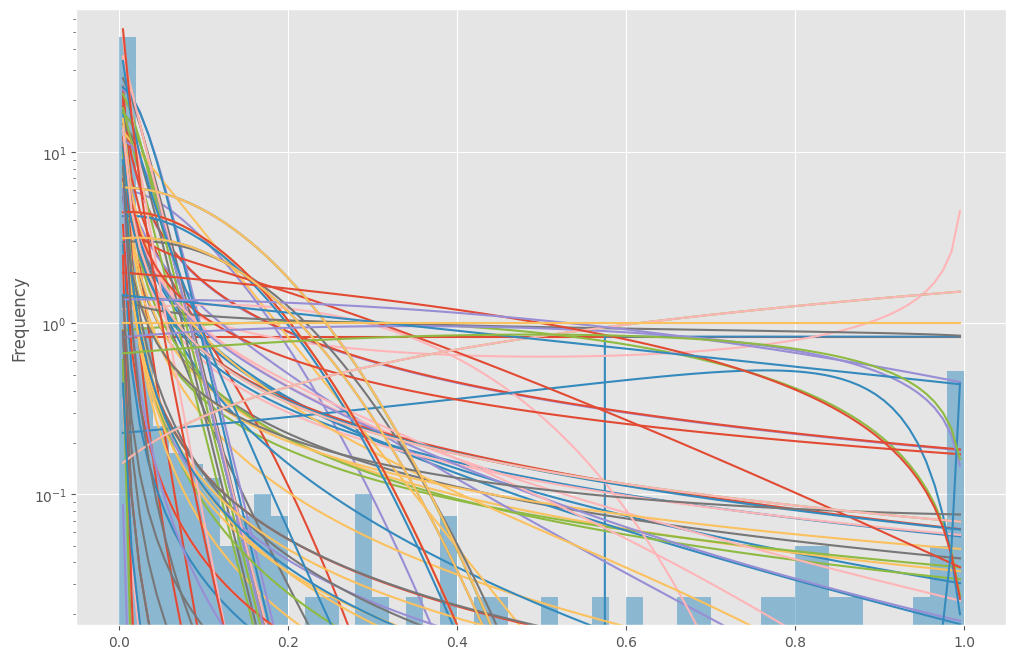

In [5]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')


# Load data from statsmodels datasets
data = pd.Series(1.0 - score for score in df['scores'][:2000])

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(
    kind='hist', 
    bins=50, 
    density=True, 
    alpha=0.5, 
    color=list(
        matplotlib.rcParams['axes.prop_cycle']
    )[1]['color']
)
ax.set_yscale('log')
# Save plot limits
dataYLim = ax.get_ylim()
# Find best fit distribution
best_distibutions = best_fit_distribution(data, 100,ax)
# Update plots
ax.set_ylim(dataYLim)
ax.set_yscale('log')

In [6]:
from scipy.stats import halflogistic
import ROOT

Welcome to JupyROOT 6.26/06


In [7]:
h_orig=ROOT.TH1F("","",100,0.0,1.0)
for w in df['scores']:
    h_orig.Fill(w)
h_orig.Scale(1.0/h_orig.Integral())

In [8]:

h=ROOT.TH1F("","",100,0.0,1.0)
def Fill_h(pdf):
    for x in pdf.index:
        h.Fill(1.-float(x),float(pdf[x]))
    return None

for dis in best_distibutions:
    if dis[0].name == "invgauss":
        Fill_h(make_pdf(dis[0],dis[1]))
#list(map(Fill_h,halflogistic.rvs(loc=0, scale=1/100, size=int(1e8))))
h.Scale((h_orig.Integral(50,100))/h.Integral(50,100))

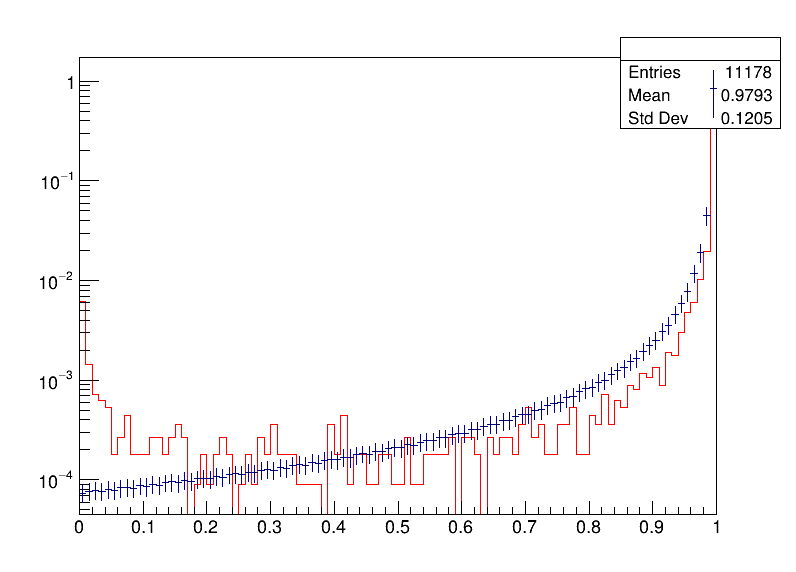

In [9]:
c=ROOT.TCanvas("","",800,600)
c.SetLogy()
h_orig.SetLineColor(ROOT.kRed)

h_orig.Draw("hist")
h.Draw("psame")

c.Draw()

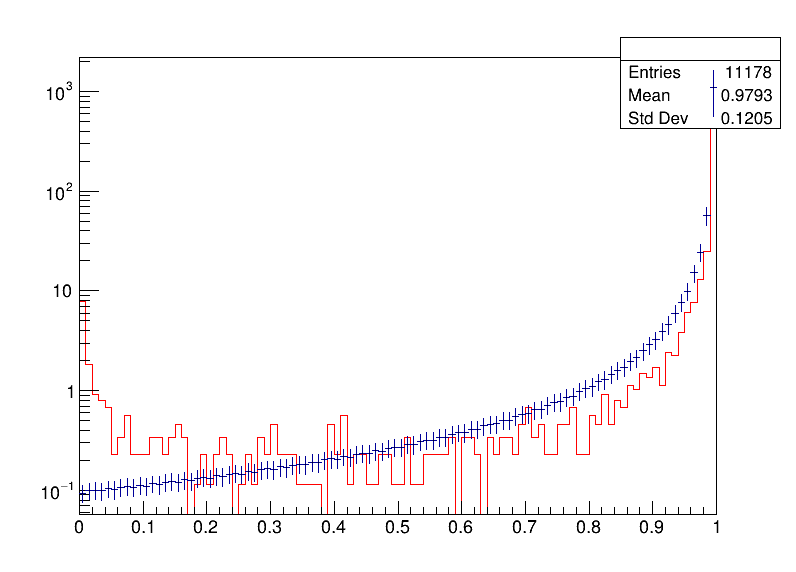

In [10]:
h.Scale(1271.3/h.Integral())
h_orig.Scale(1271.3/h_orig.Integral())
c=ROOT.TCanvas("","",800,600)
c.SetLogy()
h_orig.SetLineColor(ROOT.kRed)

h_orig.Draw("hist")
h.Draw("psame")

c.Draw()

In [11]:
best_dist = best_distibutions[0]


In [12]:
a="asdasd/Gradient_Boosting_LQ_LQ_1000.csv"
a.split("_wz")[0]


'asdasd/Gradient_Boosting_LQ_LQ_1000.csv'

In [13]:
from pathlib import Path
p=Path(a)
p.stem

'Gradient_Boosting_LQ_LQ_1000'

In [14]:
alghoname=p.stem.split("LQ_LQ")[0]
p.stem.removeprefix(alghoname)

'LQ_LQ_1000'